<a href="https://colab.research.google.com/github/alexisbianco0919/compsci216-project/blob/main/mh_benefits_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of mh_benefits 

In [2]:
# import needed libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
from scipy import stats

In [3]:
# download data from merged_data.csv
cd = pd.read_csv('https://raw.githubusercontent.com/alexisbianco0919/compsci216-project/main/clean_data_4.csv')

# print column values
print(cd['mh_benefits'].value_counts())
print('\n')

# print year values
print(cd['year'].value_counts())
print('\n')

# visualize data
cd

Yes                               1267
I don't know                       658
No                                 381
Not eligible for coverage / NA     148
Name: mh_benefits, dtype: int64


2016    1433
2017     756
2018     417
2019     352
Name: year, dtype: int64




,self_employeed,company_size,tech_company,tech_prole,mh_benefits,anonymity,leaving_difficulty,disc_mh_coworker,disc_mh_supervisor,reveal_mh_business,reveal_mh_coworkers,affects_productivity,productivity_percent,mention_ph_interview,mention_mh_interview,share_mh_ff,exp_unsupport,reveal_less,family_history,mh_in_past,mh_currently,mh_diagnosed,sought_treatment,age,gender,country_live,state_live,country_work,state_work,year,gender_cleaned
0,False,26-100,True,NaN,Not eligible for coverage / NA,I don't know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,No,NaN,No,Yes,No,NaN,NaN,39.0,Male,United Kingdom,NaN,United Kingdom,NaN,2016,male
1,False,6-25,True,NaN,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,No,NaN,Yes,Yes,Yes,NaN,NaN,29.0,male,United States of America,Illinois,United States of America,Illinois,2016,male
2,False,6-25,True,NaN,No,I don't know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Somewhat open,Maybe/Not sure,NaN,No,Maybe,No,NaN,NaN,38.0,Male,United Kingdom,NaN,United Kingdom,NaN,2016,male
3,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sometimes, if it comes up","Sometimes, if it comes up",Yes,1-25%,Yes,NaN,Neutral,No,NaN,No,Yes,Yes,NaN,NaN,43.0,male,United Kingdom,NaN,United Kingdom,NaN,2016,male
4,False,6-25,False,True,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,"Yes, I experienced",NaN,Yes,Yes,Yes,NaN,NaN,43.0,Female,United States of America,Illinois,United States of America,Illinois,2016,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,False,More than 1000,False,True,I don't know,I don't know,Somewhat difficult,No,No,NaN,NaN,NaN,NaN,Maybe,No,Very open,"Yes, I observed",Maybe,No,No,Maybe,NaN,False,27.0,male,India,NaN,India,NaN,2019,male
2954,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable to me,Not applicable to me,Yes,26-50%,Maybe,Maybe,Somewhat not open,"Yes, I observed",NaN,No,No,No,NaN,False,48.0,m,United States of America,Louisiana,United States of America,Louisiana,2019,male
2955,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable to me,Not applicable to me,Unsure,NaN,Yes,No,Very open,I've always been self-employed,NaN,No,No,No,NaN,False,50.0,M,India,NaN,India,NaN,2019,male
2956,False,More than 1000,True,True,No,Yes,Difficult,Maybe,No,NaN,NaN,NaN,NaN,No,No,Somewhat not open,Maybe/Not sure,Yes,No,No,Maybe,NaN,False,30.0,female,India,NaN,India,NaN,2019,female


## Notes


* % of `Yes` responses increases...
  * year-to-year, except for the last year
  * with age
  * with company size
  * US > Canada > Germany ~= UK *(based on countries in `country_work` that appear at least 50 times)*

* Those w/o `mh_benefits` find it more difficult to leave work than those w/ `mh_benefits`

* Those w/o `mh_benefits` are slightly more like to **not** discuss mh w/ their coworkers or supervisors

* Status of `mh_benefits` doesn't seem to impact `share_mh_ff`

* No relationship w/ `reveal_mh_business` or `reveal_mh_coworkers` *(?)*

* `mh_benefits` doesn't seem to impact `exp_unsupport` much

* W/ `reveal_less` column...
  * Those not eligible or response w/ `NA` are significantly less likely to respond `Yes` and slightly more likely to respond `No`
  * Doesn't seem to be a signficant difference in responses from those w/ `mh_benefits` and those w/o

* Those w/ `mh_benefits` are more likely to seek treatment for mh and had the lowest likelihood of not seeking treatment for mh




## Basic Demographics

### Gender

        gender  yes_percent  idk_percent  no_percent  na_percent
0         male     0.395924     0.235323    0.147501    0.046094
1       female     0.506329     0.200000    0.088608    0.048101
2  transgender     0.500000     0.142857    0.142857    0.071429
3        other     0.508197     0.131148    0.081967    0.196721


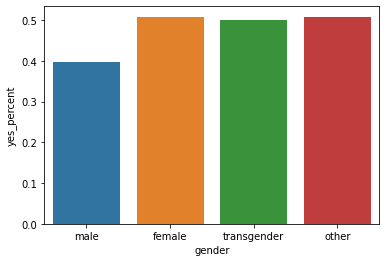

In [4]:
male_df = cd[cd['gender_cleaned'] == 'male']
num_of_male = len(male_df)
num_of_yes_male = len(male_df[male_df['mh_benefits'] == 'Yes'])
num_of_idk_male = len(male_df[male_df['mh_benefits'] == 'I don\'t know'])
num_of_no_male = len(male_df[male_df['mh_benefits'] == 'No'])
num_of_na_male = len(male_df[male_df['mh_benefits'] == 'Not eligible for coverage / NA'])
row_male = ['male', (num_of_yes_male/num_of_male), (num_of_idk_male/num_of_male), (num_of_no_male/num_of_male), (num_of_na_male/num_of_male)]

female_df = cd[cd['gender_cleaned'] == 'female']
num_of_female = len(female_df)
num_of_yes_female = len(female_df[female_df['mh_benefits'] == 'Yes'])
num_of_idk_female = len(female_df[female_df['mh_benefits'] == 'I don\'t know'])
num_of_no_female = len(female_df[female_df['mh_benefits'] == 'No'])
num_of_na_female = len(female_df[female_df['mh_benefits'] == 'Not eligible for coverage / NA'])
row_female = ['female', (num_of_yes_female/num_of_female), (num_of_idk_female/num_of_female), (num_of_no_female/num_of_female), (num_of_na_female/num_of_female)]

transgender_df = cd[cd['gender_cleaned'] == 'transgender']
num_of_transgender = len(transgender_df)
num_of_yes_transgender = len(transgender_df[transgender_df['mh_benefits'] == 'Yes'])
num_of_idk_transgender = len(transgender_df[transgender_df['mh_benefits'] == 'I don\'t know'])
num_of_no_transgender = len(transgender_df[transgender_df['mh_benefits'] == 'No'])
num_of_na_transgender = len(transgender_df[transgender_df['mh_benefits'] == 'Not eligible for coverage / NA'])
row_transgender = ['transgender', (num_of_yes_transgender/num_of_transgender), (num_of_idk_transgender/num_of_transgender), (num_of_no_transgender/num_of_transgender), (num_of_na_transgender/num_of_transgender)]

other_df = cd[cd['gender_cleaned'] == 'other']
num_of_other = len(other_df)
num_of_yes_other = len(other_df[other_df['mh_benefits'] == 'Yes'])
num_of_idk_other = len(other_df[other_df['mh_benefits'] == 'I don\'t know'])
num_of_no_other = len(other_df[other_df['mh_benefits'] == 'No'])
num_of_na_other = len(other_df[other_df['mh_benefits'] == 'Not eligible for coverage / NA'])
row_other = ['other', (num_of_yes_other/num_of_other), (num_of_idk_other/num_of_other), (num_of_no_other/num_of_other), (num_of_na_other/num_of_other)]


lst = [row_male, row_female, row_transgender, row_other]
    
gender_comparison = pd.DataFrame(lst, columns =['gender', 'yes_percent', 'idk_percent', 'no_percent', 'na_percent'], dtype = float)
print(gender_comparison)

x = sns.barplot(x="gender", y="yes_percent", data=gender_comparison)
x

### Age

mh_benefits  I don't know   No  Not eligible for coverage / NA  Yes   sum
age_range                                                                
(0, 20]                 3    2                               6    8    19
(20, 30]              271  169                              69  401   910
(30, 40]              272  151                              54  576  1053
(40, 50]               99   46                              14  223   382
(50, 60]               10   10                               4   47    71
(60, 100]               2    3                               1   11    17 


mh_benefits  I don't know        No  Not eligible for coverage / NA       Yes
age_range                                                                    
(0, 20]          0.157895  0.105263                        0.315789  0.421053
(20, 30]         0.297802  0.185714                        0.075824  0.440659
(30, 40]         0.258310  0.143400                        0.051282  0.547009
(40, 50]       

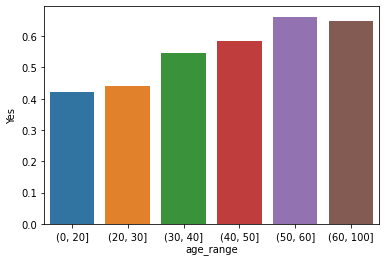

In [5]:
cd['age_range'] = pd.cut(cd['age'], [0, 20, 30, 40, 50, 60, 100])
age_range_pt = cd.pivot_table('age', index='age_range', columns='mh_benefits', aggfunc='count')
age_range_pt["sum"] = age_range_pt.sum(axis=1)
print(age_range_pt, '\n\n')

age_range_comparison = age_range_pt.loc[:,"I don't know":"Yes"].div(age_range_pt["sum"], axis=0)
print(age_range_comparison)

x = sns.barplot(x=age_range_comparison.index, y="Yes", data=age_range_comparison)
x

### Country (Work)

mh_benefits               I don't know     No  ...     Yes     sum
country_work                                   ...                
Canada                            21.0   15.0  ...    54.0    93.0
Germany                           18.0   28.0  ...    19.0    70.0
United Kingdom                    67.0   66.0  ...    61.0   226.0
United States of America         433.0  111.0  ...  1048.0  1640.0

[4 rows x 5 columns] 


mh_benefits               I don't know  ...       Yes
country_work                            ...          
Canada                        0.225806  ...  0.580645
Germany                       0.257143  ...  0.271429
United Kingdom                0.296460  ...  0.269912
United States of America      0.264024  ...  0.639024

[4 rows x 4 columns]


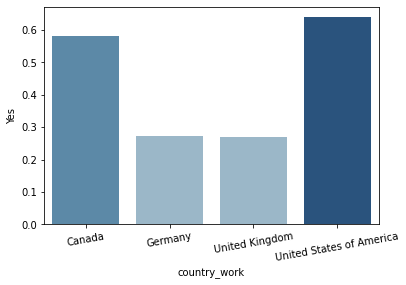

In [54]:
country_work_pt = cd.pivot_table('age', index='country_work', columns='mh_benefits', aggfunc='count')
country_work_pt["sum"] = country_work_pt.sum(axis=1)
country_work_pt = country_work_pt[country_work_pt['sum'] >= 50]
print(country_work_pt, '\n\n')

country_work_comparison = country_work_pt.loc[:,"I don't know":"Yes"].div(country_work_pt["sum"], axis=0)
print(country_work_comparison)

x = sns.barplot(x=country_work_comparison.index, y="Yes", data=country_work_comparison, palette=["#508bb3", "#94b9cf", "#94b9cf", "#1c538b"])
x.tick_params(axis='x', rotation=10)

## Other Values

### Company Size

mh_benefits     I don't know   No  Not eligible for coverage / NA  Yes  sum
company_size                                                               
1-5                       22   39                              16   15   92
100-500                  176   63                              28  345  612
26-100                   169   96                              22  248  535
500-1000                  53   18                               7  108  186
6-25                     117  111                              43  128  399
More than 1000           121   54                              32  423  630 


mh_benefits     I don't know  ...       Yes
company_size                  ...          
1-5                 0.239130  ...  0.163043
100-500             0.287582  ...  0.563725
26-100              0.315888  ...  0.463551
500-1000            0.284946  ...  0.580645
6-25                0.293233  ...  0.320802
More than 1000      0.192063  ...  0.671429

[6 rows x 4 columns]


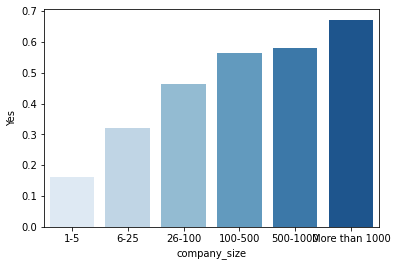

In [37]:
company_size_pt = cd.pivot_table('age', index='company_size', columns='mh_benefits', aggfunc='count')
company_size_pt["sum"] = company_size_pt.sum(axis=1)
print(company_size_pt, '\n\n')

company_size_comparison = company_size_pt.loc[:,"I don't know":"Yes"].div(company_size_pt["sum"], axis=0)
print(company_size_comparison)

x = sns.barplot(x=company_size_comparison.index, y="Yes", data=company_size_comparison, order=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'], palette='Blues')
x

### Leaving Difficulty

leaving_difficulty              Difficult  I don't know  ...  Very easy  sum
mh_benefits                                              ...                
I don't know                           32            63  ...         65  339
No                                     32            19  ...         31  168
Not eligible for coverage / NA          6            17  ...         17   65
Yes                                    42           130  ...        173  736

[4 rows x 7 columns] 


leaving_difficulty              Difficult  ...  Very easy
mh_benefits                                ...           
I don't know                     0.094395  ...   0.191740
No                               0.190476  ...   0.184524
Not eligible for coverage / NA   0.092308  ...   0.261538
Yes                              0.057065  ...   0.235054

[4 rows x 6 columns]


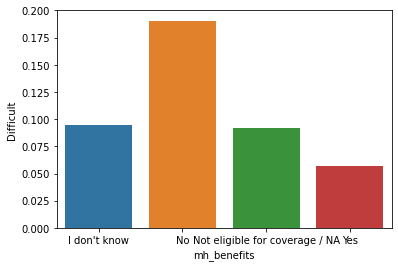

In [8]:
leaving_difficulty_pt = cd.pivot_table('age', index='mh_benefits', columns='leaving_difficulty', aggfunc='count')
leaving_difficulty_pt["sum"] = leaving_difficulty_pt.sum(axis=1)
print(leaving_difficulty_pt, '\n\n')

leaving_difficulty_comparison = leaving_difficulty_pt.loc[:,"Difficult":"Very easy"].div(leaving_difficulty_pt["sum"], axis=0)
print(leaving_difficulty_comparison)

x = sns.barplot(x=leaving_difficulty_comparison.index, y="Difficult", data=leaving_difficulty_comparison)
x

### Discuss MH w/ Coworkers

disc_mh_coworker                Maybe   No  Yes  sum
mh_benefits                                         
I don't know                      173   84   82  339
No                                 64   59   45  168
Not eligible for coverage / NA     27   17   21   65
Yes                               310  167  259  736 


disc_mh_coworker                   Maybe        No       Yes
mh_benefits                                                 
I don't know                    0.510324  0.247788  0.241888
No                              0.380952  0.351190  0.267857
Not eligible for coverage / NA  0.415385  0.261538  0.323077
Yes                             0.421196  0.226902  0.351902


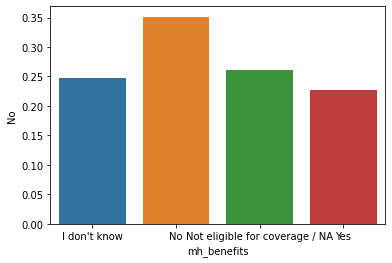

In [9]:
disc_mh_coworker_pt = cd.pivot_table('age', index='mh_benefits', columns='disc_mh_coworker', aggfunc='count')
disc_mh_coworker_pt["sum"] = disc_mh_coworker_pt.sum(axis=1)
print(disc_mh_coworker_pt, '\n\n')

disc_mh_coworker_comparison = disc_mh_coworker_pt.loc[:,"Maybe":"Yes"].div(disc_mh_coworker_pt["sum"], axis=0)
print(disc_mh_coworker_comparison)

x = sns.barplot(x=disc_mh_coworker_comparison.index, y="No", data=disc_mh_coworker_comparison)
x

### Discuss MH w/ Supervisors

disc_mh_supervisor              Maybe   No  Yes  sum
mh_benefits                                         
I don't know                      125   93  121  339
No                                 45   73   50  168
Not eligible for coverage / NA     26   18   21   65
Yes                               237  187  312  736 


disc_mh_supervisor                 Maybe        No       Yes
mh_benefits                                                 
I don't know                    0.368732  0.274336  0.356932
No                              0.267857  0.434524  0.297619
Not eligible for coverage / NA  0.400000  0.276923  0.323077
Yes                             0.322011  0.254076  0.423913


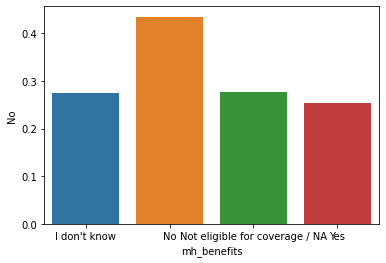

In [10]:
disc_mh_supervisor_pt = cd.pivot_table('age', index='mh_benefits', columns='disc_mh_supervisor', aggfunc='count')
disc_mh_supervisor_pt["sum"] = disc_mh_supervisor_pt.sum(axis=1)
print(disc_mh_supervisor_pt, '\n\n')

disc_mh_supervisor_comparison = disc_mh_supervisor_pt.loc[:,"Maybe":"Yes"].div(disc_mh_supervisor_pt["sum"], axis=0)
print(disc_mh_supervisor_comparison)

x = sns.barplot(x=disc_mh_supervisor_comparison.index, y="No", data=disc_mh_supervisor_comparison)
x

### Share MH w/ FF

share_mh_ff                     Neutral  ...   sum
mh_benefits                              ...      
I don't know                         89  ...   658
No                                   44  ...   381
Not eligible for coverage / NA       16  ...   148
Yes                                 127  ...  1267

[4 rows x 7 columns] 


share_mh_ff                      Neutral  ...  Very open
mh_benefits                               ...           
I don't know                    0.135258  ...   0.171733
No                              0.115486  ...   0.146982
Not eligible for coverage / NA  0.108108  ...   0.263514
Yes                             0.100237  ...   0.260458

[4 rows x 6 columns]


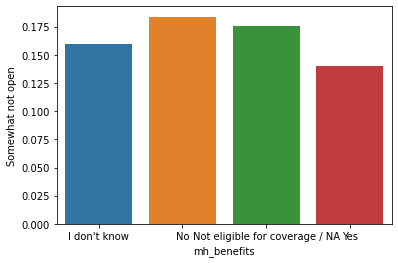

In [11]:
share_mh_ff_pt = cd.pivot_table('age', index='mh_benefits', columns='share_mh_ff', aggfunc='count')
share_mh_ff_pt["sum"] = share_mh_ff_pt.sum(axis=1)
print(share_mh_ff_pt, '\n\n')

share_mh_ff_comparison = share_mh_ff_pt.loc[:,"Maybe":"Yes"].div(share_mh_ff_pt["sum"], axis=0)
print(share_mh_ff_comparison)

x = sns.barplot(x=share_mh_ff_comparison.index, y="Somewhat not open", data=share_mh_ff_comparison)
x

### Expect Unsupport

No                                1207
Maybe/Not sure                     748
Yes, I observed                    541
Yes, I experienced                 356
I've always been self-employed      15
Name: exp_unsupport, dtype: int64 


exp_unsupport                   I've always been self-employed  ...     sum
mh_benefits                                                     ...        
I don't know                                               1.0  ...   634.0
No                                                         NaN  ...   371.0
Not eligible for coverage / NA                             NaN  ...   143.0
Yes                                                        NaN  ...  1254.0

[4 rows x 6 columns] 


exp_unsupport                   I've always been self-employed  ...  Yes, I observed
mh_benefits                                                     ...                 
I don't know                                          0.001577  ...         0.156151
No                              

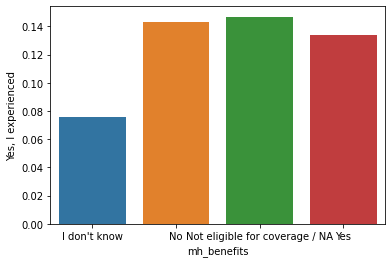

In [12]:
print(cd['exp_unsupport'].value_counts(), '\n\n')

exp_unsupport_pt = cd.pivot_table('age', index='mh_benefits', columns='exp_unsupport', aggfunc='count')
exp_unsupport_pt["sum"] = exp_unsupport_pt.sum(axis=1)
print(exp_unsupport_pt, '\n\n')

exp_unsupport_comparison = exp_unsupport_pt.loc[:,"I've always been self-employed":"Yes, I observed"].div(exp_unsupport_pt["sum"], axis=0)
print(exp_unsupport_comparison)

x = sns.barplot(x=exp_unsupport_comparison.index, y="Yes, I experienced", data=exp_unsupport_comparison)
x

### Reveal MH Less

No       734
Yes      236
Maybe    228
Name: reveal_less, dtype: int64 


reveal_less                     Maybe   No  Yes  sum
mh_benefits                                         
I don't know                       53  146   47  246
No                                 28   71   26  125
Not eligible for coverage / NA     10   37    5   52
Yes                                93  408  118  619 


reveal_less                        Maybe        No       Yes
mh_benefits                                                 
I don't know                    0.215447  0.593496  0.191057
No                              0.224000  0.568000  0.208000
Not eligible for coverage / NA  0.192308  0.711538  0.096154
Yes                             0.150242  0.659128  0.190630


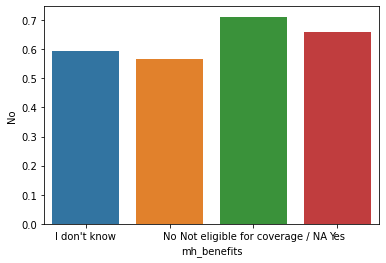

In [13]:
print(cd['reveal_less'].value_counts(), '\n\n')

reveal_less_pt = cd.pivot_table('age', index='mh_benefits', columns='reveal_less', aggfunc='count')
reveal_less_pt["sum"] = reveal_less_pt.sum(axis=1)
print(reveal_less_pt, '\n\n')

reveal_less_comparison = reveal_less_pt.loc[:,"Maybe":"Yes"].div(reveal_less_pt["sum"], axis=0)
print(reveal_less_comparison)

x = sns.barplot(x=reveal_less_comparison.index, y="No", data=reveal_less_comparison)
x

### Sought Treatment

True     936
False    589
Name: sought_treatment, dtype: int64 


sought_treatment                False  True  sum
mh_benefits                                     
I don't know                      187   152  339
No                                 82    86  168
Not eligible for coverage / NA     22    43   65
Yes                               211   525  736 


sought_treatment                   False     True 
mh_benefits                                       
I don't know                    0.551622  0.448378
No                              0.488095  0.511905
Not eligible for coverage / NA  0.338462  0.661538
Yes                             0.286685  0.713315


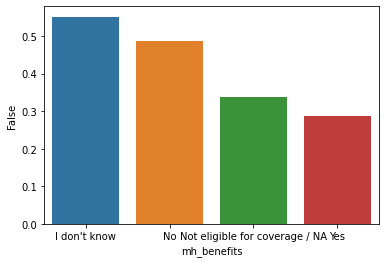

In [14]:
print(cd['sought_treatment'].value_counts(), '\n\n')

sought_treatment_pt = cd.pivot_table('age', index='mh_benefits', columns='sought_treatment', aggfunc='count')
sought_treatment_pt["sum"] = sought_treatment_pt.sum(axis=1)
print(sought_treatment_pt, '\n\n')

sought_treatment_comparison = sought_treatment_pt.loc[:,False:True].div(sought_treatment_pt["sum"], axis=0)
print(sought_treatment_comparison)

x = sns.barplot(x=sought_treatment_comparison.index, y=False, data=sought_treatment_comparison)
x

## Year-to-Year

### Survey Response

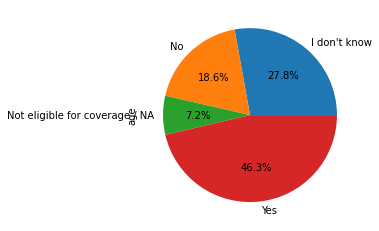

In [15]:
# 2016
data_2016 = cd[cd['year'] == 2016]
data = data_2016.groupby('mh_benefits').count()['age']
data.plot.pie(autopct="%.1f%%")

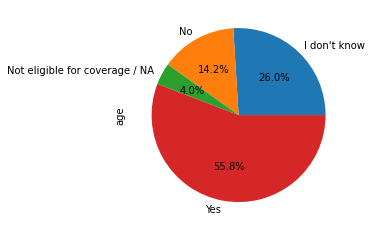

In [16]:
# 2017
data_2017 = cd[cd['year'] == 2017]
data = data_2017.groupby('mh_benefits').count()['age']
data.plot.pie(autopct="%.1f%%")

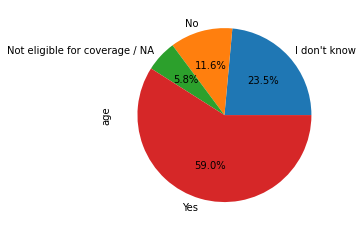

In [17]:
# 2018
data_2018 = cd[cd['year'] == 2018]
data = data_2018.groupby('mh_benefits').count()['age']
data.plot.pie(autopct="%.1f%%")

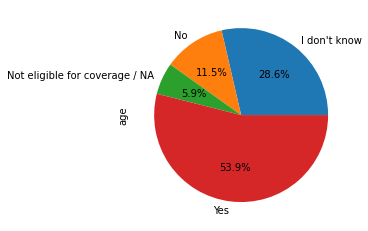

In [18]:
# 2019
data_2019 = cd[cd['year'] == 2019]
data = data_2019.groupby('mh_benefits').count()['age']
data.plot.pie(autopct="%.1f%%")

In [19]:
#a

## Hypothesis Testing

$H_{0}$: Those w/o `mh_benefits` find it equally easy (somewhat or very) to leave work than those w/ `mh_benefits`

$H_{A}$: Those w/o `mh_benefits` do not find it equally easy (somewhat or very) to leave work than those w/ `mh_benefits`

In [20]:
# print table and df
print("Pivot Table showing the intersection between the `mh_benefits` and `leaving_difficulty` columns:")
print(leaving_difficulty_pt)

leaving_easy = leaving_difficulty_pt['Somewhat easy'] + leaving_difficulty_pt['Very easy']
print("\nDataFrame showing the number of people who find it easy to leave according to their `mh_benefits`:")
print(leaving_easy, '\n\n')

# testing
n1 = leaving_difficulty_pt['sum']['Yes'] # num of people w/ benefits
n2 = leaving_difficulty_pt['sum']['No'] # num of people W/O benefits
p1 = leaving_easy['Yes'] / n1 # percentage of those who find it easy to leave amongst people w/ benefits
p2 = leaving_easy['No'] / n2 # percentage of those who find it easy to leave amongst people W/O benefits

sd1 = np.sqrt(p1 * (1 - p1))
sd2 = np.sqrt(p2 * (1 - p2))

result = stats.ttest_ind_from_stats(mean1=p1, std1=sd1, nobs1=n1,
                     mean2=p2, std2=sd2, nobs2=n2)
p_value = result[1]

print("P Value: ", p_value)

Pivot Table showing the intersection between the `mh_benefits` and `leaving_difficulty` columns:
leaving_difficulty              Difficult  I don't know  ...  Very easy  sum
mh_benefits                                              ...                
I don't know                           32            63  ...         65  339
No                                     32            19  ...         31  168
Not eligible for coverage / NA          6            17  ...         17   65
Yes                                    42           130  ...        173  736

[4 rows x 7 columns]

DataFrame showing the number of people who find it easy to leave according to their `mh_benefits`:
mh_benefits
I don't know                      155
No                                 71
Not eligible for coverage / NA     31
Yes                               385
dtype: int64 


P Value:  0.01860938982941083


#### Part 1: Coworkers
$H_{0}$: Those w/o `mh_benefits` are equally likely to **not** discuss mh w/ their coworkers w/ `mh_benefits`

$H_{A}$: Those w/o `mh_benefits` are not equally likely to **not** discuss mh w/ their coworkers  compared to those w/ `mh_benefits`

---
#### Part 2: Supervisors
$H_{0}$: Those w/o `mh_benefits` are equally likely to **not** discuss mh w/ their supervisors w/ `mh_benefits`

$H_{A}$: Those w/o `mh_benefits` are not equally likely to **not** discuss mh w/ their supervisors  compared to those w/ `mh_benefits`

In [21]:
                                                                # ----- FOR COWORKERS ----- #
# print table and df
# print("Pivot Table showing the intersection between the `mh_benefits` and `disc_mh_coworker` columns:")
# print(disc_mh_coworker_pt)

discuss_no = disc_mh_coworker_pt['No']
# print("\nDataFrame showing the number of people who will not discuss mh w/ coworker according to their `mh_benefits`:")
# print(discuss_no, '\n')

# testing
n1 = disc_mh_coworker_pt['sum']['Yes'] # num of people w/ benefits
n2 = disc_mh_coworker_pt['sum']['No'] # num of people W/O benefits
p1 = discuss_no['Yes'] / n1 # percentage of those who will not discuss mh w/ coworkers amongst people w/ benefits
p2 = discuss_no['No'] / n2 # percentage of those who will not discuss mh w/ coworkers amongst people W/O benefits

sd1 = np.sqrt(p1 * (1 - p1))
sd2 = np.sqrt(p2 * (1 - p2))

result = stats.ttest_ind_from_stats(mean1=p1, std1=sd1, nobs1=n1,
                     mean2=p2, std2=sd2, nobs2=n2)
p_value = result[1]

print("P Value w/ Coworkers: ", p_value)

                                                                # ----- FOR SUPERVISORS ----- #
# print table and df
# print("\nPivot Table showing the intersection between the `mh_benefits` and `disc_mh_supervisor` columns:")
# print(disc_mh_supervisor_pt)

discuss_no = disc_mh_supervisor_pt['No']
# print("\nDataFrame showing the number of people who will not discuss mh w/ supervisor according to their `mh_benefits`:")
# print(discuss_no, '\n')

# testing
n1 = disc_mh_supervisor_pt['sum']['Yes'] # num of people w/ benefits
n2 = disc_mh_supervisor_pt['sum']['No'] # num of people W/O benefits
p1 = discuss_no['Yes'] / n1 # percentage of those who will not discuss mh w/ supervisor amongst people w/ benefits
p2 = discuss_no['No'] / n2 # percentage of those who will not discuss mh w/ supervisor amongst people W/O benefits

sd1 = np.sqrt(p1 * (1 - p1))
sd2 = np.sqrt(p2 * (1 - p2))

result = stats.ttest_ind_from_stats(mean1=p1, std1=sd1, nobs1=n1,
                     mean2=p2, std2=sd2, nobs2=n2)
p_value = result[1]

print("P Value w/ Supervisor: ", p_value)

P Value w/ Coworkers:  0.0007604269090916312
P Value w/ Supervisor:  2.7349350101056703e-06


$H_{0}$: Those w/o `mh_benefits` are equally likely to `share_mh_ff` compared to those w/ `mh_benefits`

$H_{A}$: Those w/o `mh_benefits` are not equally likely to `share_mh_ff` compared to those w/ `mh_benefits`

In [22]:
# print table and df
print("Pivot Table showing the intersection between the `mh_benefits` and `share_mh_ff` columns:")
print(share_mh_ff_pt)

share_open = share_mh_ff_pt['Somewhat open'] + share_mh_ff_pt['Very open']
print("\nDataFrame showing the number of people who are open to share their mh condition w/ ff according to their `mh_benefits`:")
print(share_open, '\n')

# testing
n1 = share_mh_ff_pt['sum']['Yes'] # num of people w/ benefits
n2 = share_mh_ff_pt['sum']['No'] # num of people W/O benefits
p1 = share_open['Yes'] / n1 # percentage of those who are open to share their mh condition w/ ff amongst people w/ benefits
p2 = share_open['No'] / n2 # percentage of those who are open to share their mh condition w/ ff amongst people W/O benefits

sd1 = np.sqrt(p1 * (1 - p1))
sd2 = np.sqrt(p2 * (1 - p2))

result = stats.ttest_ind_from_stats(mean1=p1, std1=sd1, nobs1=n1,
                     mean2=p2, std2=sd2, nobs2=n2)
p_value = result[1]

print("P Value w/ Coworkers: ", p_value)

Pivot Table showing the intersection between the `mh_benefits` and `share_mh_ff` columns:
share_mh_ff                     Neutral  ...   sum
mh_benefits                              ...      
I don't know                         89  ...   658
No                                   44  ...   381
Not eligible for coverage / NA       16  ...   148
Yes                                 127  ...  1267

[4 rows x 7 columns]

DataFrame showing the number of people who are open to share their mh condition w/ ff according to their `mh_benefits`:
mh_benefits
I don't know                      389
No                                215
Not eligible for coverage / NA     86
Yes                               889
dtype: int64 

P Value w/ Coworkers:  5.23576838052497e-07


$H_{0}$: Those w/o `mh_benefits` are equally likely to `exp_unsupport` compared to those w/ `mh_benefits`

$H_{A}$: Those w/o `mh_benefits` are not equally likely to `exp_unsupport` compared to those w/ `mh_benefits`

In [23]:
# print table and df
print("Pivot Table showing the intersection between the `mh_benefits` and `exp_unsupport` columns:")
print(exp_unsupport_pt)

unsupport_true = exp_unsupport_pt['Yes, I experienced'] + exp_unsupport_pt['Yes, I observed']
print("\nDataFrame showing the number of people who have either experienced or observed lack of mh support according to their `mh_benefits`:")
print(share_open, '\n')

# testing
n1 = exp_unsupport_pt['sum']['Yes'] # num of people w/ benefits
n2 = exp_unsupport_pt['sum']['No'] # num of people W/O benefits
p1 = unsupport_true['Yes'] / n1 # percentage of those who have either experienced or observed lack of mh support amongst people w/ benefits
p2 = unsupport_true['No'] / n2 # percentage of those who have either experienced or observed lack of mh support amongst people W/O benefits

sd1 = np.sqrt(p1 * (1 - p1))
sd2 = np.sqrt(p2 * (1 - p2))

result = stats.ttest_ind_from_stats(mean1=p1, std1=sd1, nobs1=n1,
                     mean2=p2, std2=sd2, nobs2=n2)
p_value = result[1]

print("P Value w/ Coworkers: ", p_value)

Pivot Table showing the intersection between the `mh_benefits` and `exp_unsupport` columns:
exp_unsupport                   I've always been self-employed  ...     sum
mh_benefits                                                     ...        
I don't know                                               1.0  ...   634.0
No                                                         NaN  ...   371.0
Not eligible for coverage / NA                             NaN  ...   143.0
Yes                                                        NaN  ...  1254.0

[4 rows x 6 columns]

DataFrame showing the number of people who have either experienced or observed lack of mh support according to their `mh_benefits`:
mh_benefits
I don't know                      389
No                                215
Not eligible for coverage / NA     86
Yes                               889
dtype: int64 

P Value w/ Coworkers:  0.408775469797938


$H_{0}$: Those w/o `mh_benefits` are equally likely to reveal less about their mh after a pass experience compared to those w/o `mh_benefits`

$H_{A}$: Those w/o `mh_benefits` are not equally likely to reveal less about their mh after a pass experience compared to those w/o `mh_benefits`

In [26]:
# print table and df
print("Pivot Table showing the intersection between the `mh_benefits` and `reveal_less` columns:")
print(reveal_less_pt)

reveal_less_true = reveal_less_pt["Yes"]
print("\nDataFrame showing the number of people who are less likely to reveal their mh after a pass experience according to their `mh_benefits`:")
print(reveal_less_true, '\n')

# testing
n1 = reveal_less_pt['sum']['Yes'] # num of people w/ benefits
n2 = reveal_less_pt['sum']['No'] # num of people W/O benefits
p1 = reveal_less_true['Yes'] / n1 # percentage of those who are less likely to reveal their mh after a pass experience amongst people w/ benefits
p2 = reveal_less_true['No'] / n2 # percentage of those who are less likely to reveal their mh after a pass experience amongst people W/O benefits

sd1 = np.sqrt(p1 * (1 - p1))
sd2 = np.sqrt(p2 * (1 - p2))

result = stats.ttest_ind_from_stats(mean1=p1, std1=sd1, nobs1=n1,
                     mean2=p2, std2=sd2, nobs2=n2)
p_value = result[1]

print("P Value: ", p_value)

Pivot Table showing the intersection between the `mh_benefits` and `reveal_less` columns:
reveal_less                     Maybe   No  Yes  sum
mh_benefits                                         
I don't know                       53  146   47  246
No                                 28   71   26  125
Not eligible for coverage / NA     10   37    5   52
Yes                                93  408  118  619

DataFrame showing the number of people who are less likely to reveal their mh after a pass experience according to their `mh_benefits`:
mh_benefits
I don't know                       47
No                                 26
Not eligible for coverage / NA      5
Yes                               118
Name: Yes, dtype: int64 

P Value:  0.6539696675234686


#### Part 1
$H_{0}$: Those w/ `mh_benefits` are equally likely to seek treatment for mh compared to those w/o `mh_benefits`

$H_{A}$: Those w/ `mh_benefits` are not equally likely to seek treatment for mh compared to those w/o `mh_benefits`

---
#### Part 2
$H_{0}$: Those w/ `mh_benefits` are equally likely to not seeking treatment for mh

$H_{A}$: Those w/ `mh_benefits` are not equally likely to not seeking treatment for mh compared to those w/o `mh_benefits`

In [27]:
                                                                # ----- Have Sought Treatment ----- #
# print table and df
print("Pivot Table showing the intersection between the `mh_benefits` and `sought_treatment` columns:")
print(sought_treatment_pt)

sought_true = sought_treatment_pt[True]
print("\nDataFrame showing the number of people who have sought treatment according to their `mh_benefits`:")
print(sought_true, '\n')

# testing
n1 = sought_treatment_pt['sum']['Yes'] # num of people w/ benefits
n2 = sought_treatment_pt['sum']['No'] # num of people W/O benefits
p1 = sought_true['Yes'] / n1 # percentage of those who have sought treatment amongst people w/ benefits
p2 = sought_true['No'] / n2 # percentage of those who have sought treatment amongst people W/O benefits

sd1 = np.sqrt(p1 * (1 - p1))
sd2 = np.sqrt(p2 * (1 - p2))

result = stats.ttest_ind_from_stats(mean1=p1, std1=sd1, nobs1=n1,
                     mean2=p2, std2=sd2, nobs2=n2)
p_value = result[1]

print("P Value w/ having sought treatment: ", p_value)

                                                                # ----- Have NOT Sought Treatment ----- #
# print table and df
print("Pivot Table showing the intersection between the `mh_benefits` and `sought_treatment` columns:")
print(sought_treatment_pt)

sought_true = sought_treatment_pt[False]
print("\nDataFrame showing the number of people who have NOT sought treatment according to their `mh_benefits`:")
print(sought_true, '\n')

# testing
n1 = sought_treatment_pt['sum']['Yes'] # num of people w/ benefits
n2 = sought_treatment_pt['sum']['No'] # num of people W/O benefits
p1 = sought_true['Yes'] / n1 # percentage of those who have NOT sought treatment amongst people w/ benefits
p2 = sought_true['No'] / n2 # percentage of those who have NOT sought treatment amongst people W/O benefits

sd1 = np.sqrt(p1 * (1 - p1))
sd2 = np.sqrt(p2 * (1 - p2))

result = stats.ttest_ind_from_stats(mean1=p1, std1=sd1, nobs1=n1,
                     mean2=p2, std2=sd2, nobs2=n2)
p_value = result[1]

print("P Value w/ having NOT sought treatment: ", p_value)

Pivot Table showing the intersection between the `mh_benefits` and `sought_treatment` columns:
sought_treatment                False  True  sum
mh_benefits                                     
I don't know                      187   152  339
No                                 82    86  168
Not eligible for coverage / NA     22    43   65
Yes                               211   525  736

DataFrame showing the number of people who have sought treatment according to their `mh_benefits`:
mh_benefits
I don't know                      152
No                                 86
Not eligible for coverage / NA     43
Yes                               525
Name: True, dtype: int64 

P Value w/ having sought treatment:  4.032057255764824e-07
Pivot Table showing the intersection between the `mh_benefits` and `sought_treatment` columns:
sought_treatment                False  True  sum
mh_benefits                                     
I don't know                      187   152  339
No                 